In [1]:
# importing the dependencies
#%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Precipitation Analysis

### Using Pandas

In [10]:
# Using Pandas 
weather_data = pd.read_sql("SELECT * FROM measurement", engine)
weather_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [12]:
end_date = latest_date

In [13]:
end_date

'2017-08-23'

In [14]:
start_date = dt.datetime.strptime(end_date, '%Y-%m-%d') - dt.timedelta(days=365)

In [15]:
start_date

datetime.datetime(2016, 8, 23, 0, 0)

In [16]:
start_date = start_date.strftime('%y-%m-%d')

In [17]:
start_date

'16-08-23'

In [18]:
start_date = "2016-08-23"
end_date = "2017-08-23"

weather_data_one_year = weather_data[weather_data["date"].between(start_date, end_date)]
weather_data_one_year.head()

,id,station,date,prcp,tobs
2363,2364,USC00519397,2016-08-23,0.00,81.0
2364,2365,USC00519397,2016-08-24,0.08,79.0
2365,2366,USC00519397,2016-08-25,0.08,80.0
2366,2367,USC00519397,2016-08-26,0.00,79.0
2367,2368,USC00519397,2016-08-27,0.00,77.0


In [19]:
len(weather_data_one_year)

2230

In [20]:
precipitation_data = weather_data_one_year[["prcp", "date"]]
precipitation_data.set_index('date', inplace=True)
# Sort the dataframe by date
precipitation_data_sorted = precipitation_data.sort_values('date', ascending=True )
precipitation_data_sorted.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


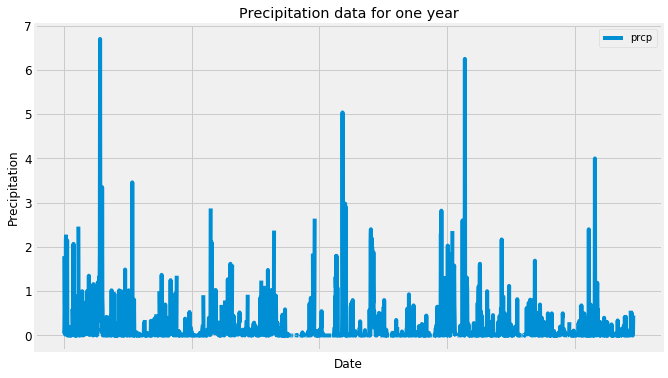

In [60]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
precipitation_chart = precipitation_data_sorted.plot(kind = "line",grid=True, figsize=(10,6), rot=30, x_compat=True, fontsize=12, title = "Precipitation data for one year")
precipitation_chart.set_xlabel("Date")
precipitation_chart.set_ylabel("Precipitation")
plt.show()

### Using Session Query

In [22]:
## Using Session Query
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [23]:
# Date 12 months from the latest date
last_twelve_months = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_twelve_months

datetime.datetime(2016, 8, 23, 0, 0)

In [24]:
# Retrieve the last 12 months of precipitation data
p_results = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= last_twelve_months).\
                    order_by(Measurement.date).all()

In [25]:
# Put data into dataframe
precipitation_df = pd.DataFrame(p_results, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)
precipitation_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


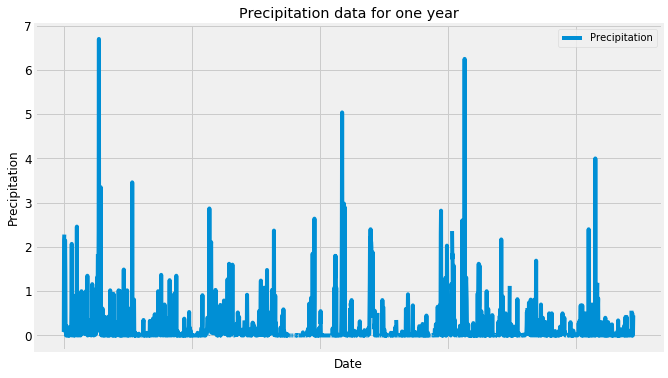

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
precipitation_chart_new = precipitation_df.plot(kind = "line",grid=True, figsize=(10,6), rot=30, x_compat=True, fontsize=12, title = "Precipitation data for one year")
precipitation_chart_new.set_xlabel("Date")
precipitation_chart_new.set_ylabel("Precipitation")
plt.show()

- Use Pandas to calculate the summary statistics for the precipitation data


In [27]:
# Using Pandas
precipitation_data_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
## Using Session Query data
# Print the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

### Using Pandas

In [29]:
station_data = pd.read_sql("SELECT * FROM station", engine)
station_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [30]:
# How many stations are available in this dataset?
station_data["station"].count()

9

In [31]:
# What are the most active stations?
# List the stations and the counts in descending order.
weather_data["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [32]:
weather_data_station_counts = weather_data["station"].value_counts()

In [34]:
# The station with maximum number of temperature observations
active_station = weather_data_station_counts.index[0]
active_station

'USC00519281'

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
weather_data_active_station = weather_data.loc[(weather_data["station"] == active_station), :]
Lowest_temperature = weather_data_active_station["tobs"].min()
Highest_temperature = weather_data_active_station["tobs"].max()
Average_temperature =  weather_data_active_station["tobs"].mean()
print(f"For the most active station The lowest temperature, The Highest temperature, The Average temperature is {Lowest_temperature} , {Highest_temperature}, {Average_temperature}")

For the most active station The lowest temperature, The Highest temperature, The Average temperature is 54.0 , 85.0, 71.66378066378067


In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
start_date = "2016-08-23"
end_date = "2017-08-23"

weather_data_one_year = weather_data[weather_data["date"].between(start_date, end_date)]
weather_data_active_station_one_year = weather_data_one_year.loc[(weather_data_one_year["station"] == active_station), :]

In [37]:
temperature_data = weather_data_active_station_one_year[["tobs", "date"]]
x_data = temperature_data["tobs"]

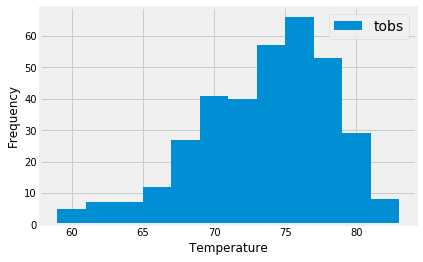

In [38]:
plt.hist(x_data, 12, label = "tobs") 
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc=1, prop={'size': 14})
plt.show()

### Using Session Query

In [39]:
# How many stations are available in this dataset?
station_count = session.query(Station).count()
print(f"The number of weather stations on Honolulu Hawaii are {station_count}.")

The number of weather stations on Honolulu Hawaii are 9.


In [40]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_observation_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_observation_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
# The station with maximum number of temperature observations
station_observation_count[0][0]

'USC00519281'

In [42]:
print(f"The weather station with the highest amount of observations is {station_observation_count[0][0]} with {station_observation_count[0][1]} observations.")

The weather station with the highest amount of observations is USC00519281 with 2772 observations.


In [63]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_station = station_observation_count[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == active_station).all()

[(54.0, 85.0, 71.66378066378067)]

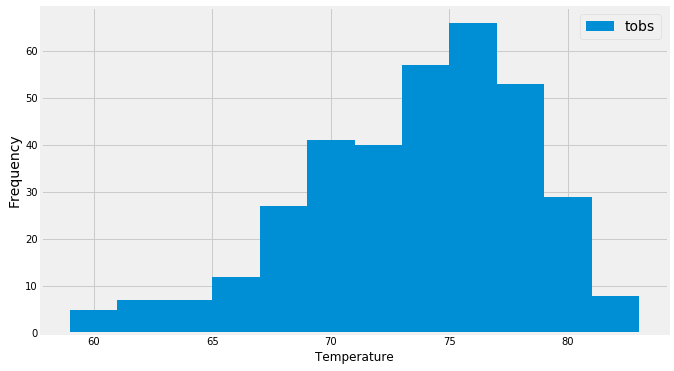

In [64]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs, Measurement.date).\
filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23', Measurement.station == active_station).all()

df = pd.DataFrame(results)

# Plot the results as a histogram with bins=12.
df.plot.hist(bins=12, grid=True, figsize=(10,6))
plt.ylabel('Frequency', size=14)
plt.xlabel('Temperature')
plt.legend(loc=1, prop={'size': 14})
plt.show()

## Temperature Analysis (Optional)

In [65]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [66]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [67]:
trip_results = calc_temps('2017-02-28', '2017-03-05')
trip_results

[(64.0, 72.02777777777777, 78.0)]

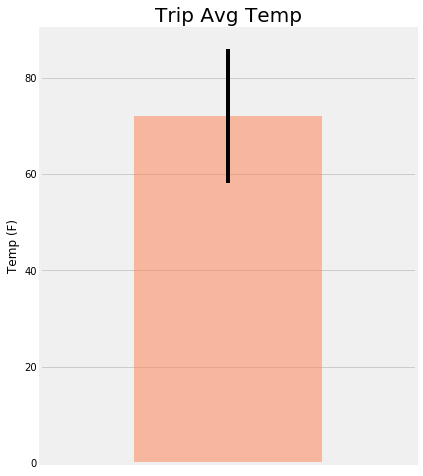

In [68]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(trip_results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
temp_chart = avg_temp.plot(kind='bar', yerr=min_max_temp, grid = True, figsize=(6,8), alpha=0.5, color='coral')
temp_chart.set_title("Trip Avg Temp", fontsize=20)
temp_chart.set_ylabel("Temp (F)")
plt.xticks([])
plt.show()

### Using pandas

In [49]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
trip_start_date = "2017-02-28"
trip_end_date = "2017-03-5"

weather_data_one_year_trip = weather_data_one_year[weather_data_one_year["date"].between(trip_start_date, trip_end_date)]
weather_data_one_year_trip_per_station = weather_data_one_year_trip.groupby("station")
weather_data_one_year_trip_per_station["prcp"].sum()

station
USC00513117    6.95
USC00514830    2.06
USC00516128    5.51
USC00517948    3.04
USC00519281    6.85
USC00519397    2.76
USC00519523    3.27
Name: prcp, dtype: float64

### using session query

In [53]:
## using session query
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
trip_start_date = "2017-02-28"
trip_end_date = "2017-03-5"
rainfall_trip = session.query(Measurement.station, func.sum(Measurement.prcp)).filter(Measurement.date >= trip_start_date , Measurement.date <= trip_end_date).group_by(Measurement.station).\
order_by(func.sum(Measurement.prcp).desc()).all()

print("Total Rainfall Last Year")
for station, rainfall in rainfall_trip:
    print(f"Station: {station}, Total Rainfall: {rainfall}.")

Total Rainfall Last Year
Station: USC00513117, Total Rainfall: 6.95.
Station: USC00519281, Total Rainfall: 6.85.
Station: USC00516128, Total Rainfall: 5.51.
Station: USC00519523, Total Rainfall: 3.27.
Station: USC00517948, Total Rainfall: 3.04.
Station: USC00519397, Total Rainfall: 2.76.
Station: USC00514830, Total Rainfall: 2.0599999999999996.


In [52]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)]
results = session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date >='2017-01-01').\
filter(Measurement.date <= '2017-01-07').group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
results

[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.61),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.6),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.35),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.2),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0)]

In [54]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [55]:
# calculate the daily normals for your trip
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("02-28")

# push each tuple of calculations into a list called `normals`


# Set the start and end date of the trip
trip_start_date = "2017-02-28"
trip_end_date = "2017-03-5"

# Use the start and end date to create a range of dates
date_range = pd.date_range(start='2017-02-28', end='2017-03-5')

# Stip off the year and save a list of %m-%d strings

MonthDate = date_range.map(lambda x:x.strftime('%m-%d'))


# Loop through the list of %m-%d strings and calculate the normals for each date
trips_normals_list = []
for elements in MonthDate:
    trips_normals = daily_normals(elements)
    trips_normals_list.append(trips_normals)
print(trips_normals_list)


[[(65.0, 70.65517241379311, 80.0)], [(64.0, 70.0327868852459, 76.0)], [(61.0, 70.36666666666666, 78.0)], [(60.0, 70.06896551724138, 78.0)], [(57.0, 69.27272727272727, 77.0)], [(60.0, 67.89090909090909, 76.0)]]


In [56]:
# Loop through the list of %m-%d strings and calculate the normals for each date
trips_normals_Min_temp = []
Min_Temp, Avg_Temp, Max_Temp = [], [], []
for elements in MonthDate:
    trips_normals = daily_normals(elements)
    for x, y, z in trips_normals:
        xs = x
        ys = y
        zs = z
    Min_Temp.append(xs)
    Avg_Temp.append(ys)
    Max_Temp.append(zs)

In [57]:
Trip_dates = ['2018-02-28', '2018-03-01', '2018-03-02', '2018-03-03',
               '2018-03-04', '2018-03-05']

In [58]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trips_normals_list_df = pd.DataFrame({'Min_Temp' : Min_Temp, 'Avg_Temp' : Avg_Temp, 'Max_Temp':Max_Temp}, index = Trip_dates)
trips_normals_list_df

,Min_Temp,Avg_Temp,Max_Temp
2018-02-28,65.0,70.655172,80.0
2018-03-01,64.0,70.032787,76.0
2018-03-02,61.0,70.366667,78.0
2018-03-03,60.0,70.068966,78.0
2018-03-04,57.0,69.272727,77.0
2018-03-05,60.0,67.890909,76.0


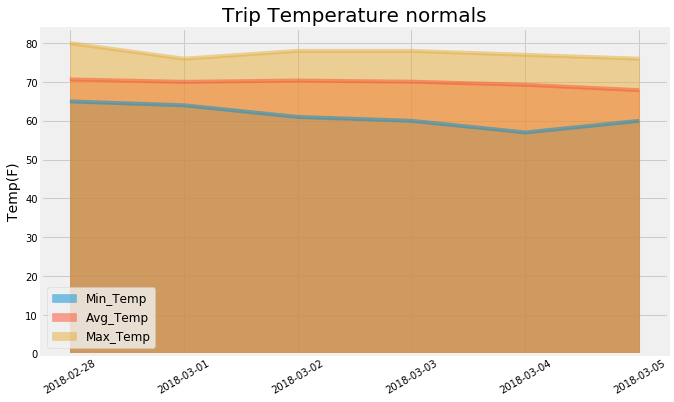

In [59]:
# Plot the daily normals as an area plot with `stacked=False`

trips_normals_list_df.plot(kind='area', stacked= False, rot = 30, alpha=0.5, figsize=(10,6))

x_axis  =  np.arange(0, len(Trip_dates))
tick_locations = []
for x in x_axis:
   tick_locations.append(x)
plt.xticks(tick_locations, Trip_dates)
plt.title("Trip Temperature normals", fontsize=20)
plt.ylabel('Temp(F)', size=14)
plt.legend(loc=3, prop={'size': 12})
plt.show()